# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib import cm
import matplotlib as mlp

# Objective Function

In [2]:
def objective_function(x, y):
    first_term = np.power(x,2) + y -11
    second_term = x + np.power(y,2) - 7
    return np.power(first_term,2)+ np.power(second_term,2)

In [3]:
%matplotlib inline
mlp.rcParams['figure.dpi'] = 200

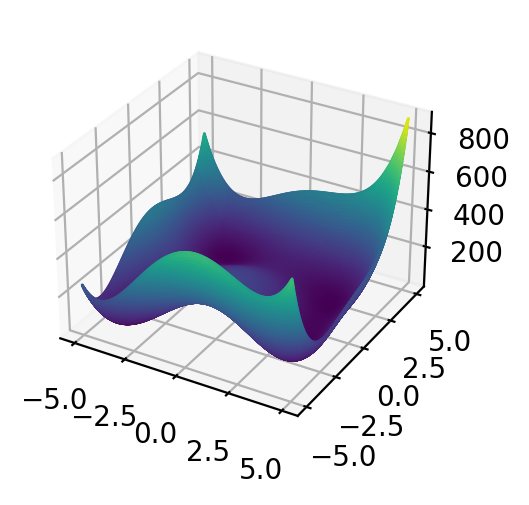

In [4]:
# creating an empty figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
 
# creating a range of 200 elements in both
# X and Y
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)

# Creating a mesh grid of X and Y
X, Y = np.meshgrid(X, Y)
 
# Creating an expression X and Y and
Z = objective_function(X, Y)

norm = plt.Normalize(Z.min(), Z.max())
colors = cm.viridis(norm(Z))
rcount, ccount, _ = colors.shape


surf = ax.plot_surface(X, Y, Z, rcount=rcount, ccount=ccount,
                       facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))
plt.show()

# PSO 

In [5]:
class Particle:
    def __init__(self, inertia=0.5, social=2, cognitive=1):
        self.pos = np.random.uniform(low=-10, high=10, size=(1, 2))[0]
        self.vel = np.random.uniform(size=(1, 2))[0]
        self.pos_best = []
        self.err = -1
        self.err_best = -1
        # params
        self.inertia = inertia
        self.social = social
        self.cognitive = cognitive
        
    # evaluate current fitness
    def evaluate(self, objective_function):
        self.err=objective_function(self.pos[0], self.pos[1])
        # check to see if the current position is an individual best
        if self.err < self.err_best or self.err_best==-1:
            self.pos_best=self.pos
            self.err_best=self.err

    # update new particle velocity
    def update_velocity(self, pos_best_g):
        w=self.inertia       # constant inertia weight (how much to weigh the previous velocity)
        c1=self.cognitive       # cognative constant
        c2=self.social        # social constant

        r1=np.random.uniform()
        r2=np.random.uniform()
        vel_cognitive = c1*r1*(self.pos_best-self.pos)
        vel_social = c2*r2*(pos_best_g-self.pos)
        self.vel=w*self.vel+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self):
        self.pos=self.pos+self.vel


In [6]:
class PSO():
    def __init__(self, objective_function, size, ngen):
        err_best=-1                   # best error for group
        pos_best=[]                   # best position for group

        swarm=[Particle() for i in range(size)]

        # begin optimization loop
        i=0
        while i < ngen:
            print(i,err_best)
            # cycle through particles in swarm and evaluate fitness
            for j in range(size):
                swarm[j].evaluate(objective_function)

                # determine if current particle is the best (globally)
                if swarm[j].err < err_best or err_best == -1:
                    pos_best = swarm[j].pos
                    err_best = swarm[j].err

            # cycle through swarm and update velocities and position
            for j in range(size):
                swarm[j].update_velocity(pos_best)
                swarm[j].update_position()
            i+=1

        # print final results
        print('FINAL:')
        print(pos_best)
        print(err_best)

In [10]:
PSO(objective_function, 100, 30)

0 -1
1 14.160558316882103
2 4.438586175834377
3 0.5552311477066378
4 0.5552311477066378
5 0.5552311477066378
6 0.21972017330431792
7 0.043858455095059125
8 0.024382041949934034
9 0.024034726649285153
10 0.006421837806164618
11 0.006421837806164618
12 0.0009103292357419256
13 0.0007184363291801619
14 0.00035876904804116636
15 0.00035876904804116636
16 8.279921551743868e-05
17 8.279921551743868e-05
18 2.452049530511832e-05
19 2.452049530511832e-05
20 6.484165575283292e-06
21 6.484165575283292e-06
22 3.705136385800239e-06
23 3.705136385800239e-06
24 3.705136385800239e-06
25 1.068784076181658e-06
26 6.475095507573488e-07
27 6.996681774233515e-08
28 6.996681774233515e-08
29 6.996681774233515e-08
FINAL:
[ 3.58440065 -1.84807442]
6.996681774233515e-08
